In [149]:
#!/usr/bin/python3

import numpy as np
from sys import argv

from datetime import datetime
#import concurrent.futures

# import ast
#  for development 
# import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt

import ete3



datasets_address= "/work/FAC/FBM/DBC/cdessim2/default/smajidi1/fastoma/archive/"
# oma_database_address = datasets_address + "OmaServer.h5"
# hog_og_map_address = datasets_address + "hog_og_map.dic"
omaID_address = datasets_address+"oma-species.txt"
bird6ID_address = datasets_address+"info.tsv"



def read_taxonID_map(omaID_address,bird6ID_address):
    
    omaID_file = open(omaID_address,'r')
    taxonID_omaID={}
    omaID_taxonID={}
    for line in omaID_file:
        line_strip = line.strip()
        if line_strip.startswith('#'):
            pass
            #header_lines_list.append(line_strip)
        else:
            line_parts=line_strip.split('\t')

            omaID = line_parts[0]
            taxonID = int(line_parts[1])
            taxonID_omaID[taxonID]=omaID
            omaID_taxonID[omaID]=taxonID
            
    omaID_file.close()
        
    current_time = datetime.now().strftime("%H:%M:%S")
    print(current_time, "- The map for taxonID omaID of",len(taxonID_omaID),"records have read.") 
    
    
    bird6ID_file = open(bird6ID_address,'r')
    taxonID_bird6ID={}
    bird6ID_taxonID= {}
    for line in bird6ID_file:
        line_strip = line.strip()
        if line_strip.startswith('Or'):
            pass
            line_strip1=line_strip
            #header_lines_list.append(line_strip)
        else:
            line_parts=line_strip.split('\t')

            bird6ID = line_parts[6]
            taxonID = int(line_parts[8])
            taxonID_bird6ID[taxonID]=bird6ID
            bird6ID_taxonID[bird6ID]=taxonID
            
    bird6ID_file.close()
        
    current_time = datetime.now().strftime("%H:%M:%S")
    print(current_time, "- The map for taxonID bird6ID of",len(taxonID_bird6ID),"records have read.") 
  
    return (taxonID_omaID,taxonID_bird6ID,omaID_taxonID,bird6ID_taxonID)
    
         
(taxonID_omaID,taxonID_bird6ID,omaID_taxonID,bird6ID_taxonID) = read_taxonID_map(omaID_address,bird6ID_address)
# left is the ky
# taxonID_omaID  {taxonID:omaID, .. }
# taxonID_omaID[1111]=ABABA

taxonID_map = {**taxonID_omaID,**taxonID_bird6ID }

print(len(taxonID_omaID),len(taxonID_bird6ID),len(taxonID_map))
#taxonID_list= list(taxonID_map.keys())

09:14:08 - The map for taxonID omaID of 2424 records have read.
09:14:08 - The map for taxonID bird6ID of 363 records have read.
2424 363 2778


# Reading FastOMA bird  tree

In [248]:

project_folder_root="/work/FAC/FBM/DBC/cdessim2/default/smajidi1/fastoma/v3b/" # v3b/
project_folder = project_folder_root +"hogmapX/"

#bird_tree_address=project_folder_root+"iqtree10/_100_msa_concatanated.txt_copy1.contree"

bird_tree_address=project_folder_root+"iqtree5/_100_msa_concatanated.txt_copy1.contree_collapsed_brnch_0.01" # 1e-05" # 
#"iqtree5/_100_msa_concatanated.txt_copy1.contree"
#"iqtree4_1/_100_msa_concatanated.txt.contree"
#"iqtree5/_100_msa_concatanated.txt_copy1.contree"
#"iqtree11/border_out_parition.nex.contree"
#_100_msa_concatanated.txt_copy1.contree" # _collapsed_95


bird_tree_address 

'/work/FAC/FBM/DBC/cdessim2/default/smajidi1/fastoma/v3b/iqtree5/_100_msa_concatanated.txt_copy1.contree_collapsed_brnch_0.01'

In [249]:
bird_tree_raw= ete3.Tree(bird_tree_address) # ,format=0
len(bird_tree_raw)
#bird_tree.write()

bird_tree_leaves_omaID_bird6ID=[]
for node in bird_tree_raw.traverse(strategy="postorder"):
    if node.is_leaf() : # why ?
        bird_tree_leaves_omaID_bird6ID.append(node.name)
    
print("bird_hog_tree_leaf_count",len(bird_tree_leaves_omaID_bird6ID))
bird_tree_leaves_omaID_bird6ID[:3]

bird_tree_leaves_taxonID = []
for i3 in bird_tree_leaves_omaID_bird6ID:
    if i3 in omaID_taxonID:
        taxonID=omaID_taxonID[i3]
    if i3  in bird6ID_taxonID:
        taxonID= bird6ID_taxonID[i3]
    # if it was in the both I save the bird ID    
    bird_tree_leaves_taxonID.append(taxonID)

bird_tree_leaves_taxonID_unq=list(set(bird_tree_leaves_taxonID))

print(len(bird_tree_leaves_taxonID),len(bird_tree_leaves_taxonID_unq))
bird_tree_leaves_taxonID_unq[:3]


both_bird_oma_taxonID=[]
for i in bird_tree_leaves_taxonID_unq:
    if bird_tree_leaves_taxonID.count(i)>1:
        both_bird_oma_taxonID.append(i)
print(both_bird_oma_taxonID)

both_bird_oma_omaID=[]
for i in both_bird_oma_taxonID:
    both_bird_oma_omaID.append(taxonID_omaID[i])

print(both_bird_oma_omaID)

bird_tree_leaves_omaID_bird6ID_uniq=[i for i in bird_tree_leaves_omaID_bird6ID if i not in both_bird_oma_omaID]
print(len(bird_tree_leaves_omaID_bird6ID),len(bird_tree_leaves_omaID_bird6ID_uniq))


bird_tree= ete3.Tree(bird_tree_address)
bird_tree.prune(bird_tree_leaves_omaID_bird6ID_uniq)

print(len(bird_tree_raw),len(bird_tree))


bird_hog_tree_leaf_count 383
383 375
[59729, 59894, 8839, 9031, 13146, 9135, 9157, 40217]
['TAEGU', 'FICAL', 'ANAPL', 'CHICK', 'MELUD', 'SERCA', 'PARMJ', 'JUNHY']
383 375
383 375


# Reading  NCBI tree

In [250]:
ncbi = ete3.NCBITaxa()  # first time download in ~/.etetoolkit/
ncbi_sub_tree = ncbi.get_topology(bird_tree_leaves_taxonID_unq)

## change the node name from NCBI taxon id (integer) to   omaID (5-letter) or bird6ID (6-letter)

for node in ncbi_sub_tree.traverse(strategy="postorder"):
    node.name2 = node.name
    if node.is_leaf() : # why ? and int(node.name) in taxonID_map
        node.name = taxonID_map[int(node.name)]

#current_time = datetime.now().strftime("%H:%M:%S")
#print(current_time, 
print("The NCBI taxanomy is read and the leaves names changed to OMA/bird6 ID containing")
print(len(ncbi_sub_tree)) 
#print(ncbi_sub_tree.get_ascii(attributes=["name"]))     

#ncbi_sub_tree.write() 

The NCBI taxanomy is read and the leaves names changed to OMA/bird6 ID containing
375


# Reading bird paper tree

In [251]:
bird_paper_tree_address= "/work/FAC/FBM/DBC/cdessim2/default/smajidi1/fastoma/archive/bird_paper_tree.txt"
bird_paper_tree_raw= ete3.Tree(bird_paper_tree_address, format=1)
#len(bird_paper_tree_raw)

bird_paper_tree_leaves=[]
for node in bird_paper_tree_raw.traverse(strategy="postorder"):
    if node.is_leaf() : # why ?
        bird_paper_tree_leaves.append(node.name)
print(len(bird_paper_tree_leaves))
bird_paper_tree_leaves[:3]



bird_SCINAME_address= "/work/FAC/FBM/DBC/cdessim2/default/smajidi1/fastoma/archive/"+"SCINAME_all_pure_under.txt"

def read_bird_SCINAME(bird_SCINAME_address):
    
    bird_SCINAME_file = open(bird_SCINAME_address,'r')
    bird_SCINAME_list = []
    
    for line in bird_SCINAME_file:
        line_strip = line.strip()
        bird_SCINAME_list.append(line_strip)
        
    current_time = datetime.now().strftime("%H:%M:%S")
    print(current_time, "- The bird science name  for ",len(bird_SCINAME_list),"records have read.") 
    return bird_SCINAME_list


bird_SCINAME_list = read_bird_SCINAME(bird_SCINAME_address)

#bird_paper_tree_raw.prune(bird_SCINAME_list)

notin_paper_tree= []
for i in bird_SCINAME_list:
    if i not in bird_paper_tree_leaves: 
        notin_paper_tree.append(i)
print(notin_paper_tree)
#notin_paper_tree=["Cercotrichas_coryphaeus","Corvus_cornix","Eolophus_roseicapillus","Nannopterum_auritus","Nannopterum_brasilianus","Nannopterum_harrisi","Urile_pelagicus"]


        
bird_SCINAME_list_filt=[i for i in bird_SCINAME_list if i not in notin_paper_tree]
print(len(bird_SCINAME_list),len(bird_SCINAME_list_filt) )
    

bird_paper_tree= ete3.Tree(bird_paper_tree_address, format=1)

bird_paper_tree.prune(bird_SCINAME_list_filt)
len(bird_paper_tree)

bird_paper_tree_nodes =[]

for node in bird_paper_tree.traverse(strategy="postorder"):
    node.name2 = node.name
    if node.is_leaf() : # why ? and int(node.name) in taxonID_map
        
        node_name = node.name
        node_name_split= node_name.split('_')
        six_letter_name= ''.join([i[:3].upper() for i in node_name_split])
        if len(six_letter_name)<5:
            print(node_name)
        else:
            node.name= six_letter_name
            #print(six_letter_name)
            bird_paper_tree_nodes.append(six_letter_name)

len(bird_paper_tree_nodes)

10135
09:21:21 - The bird science name  for  363 records have read.
['Cercotrichas_coryphaeus', 'Corvus_cornix', 'Eolophus_roseicapillus', 'Nannopterum_auritus', 'Nannopterum_brasilianus', 'Nannopterum_harrisi', 'Urile_pelagicus']
363 356


356

# Comapring intersection all trees

In [252]:
ncbi_sub_tree_nodes =[]
for node in ncbi_sub_tree.traverse(strategy="postorder"):
    if node.is_leaf() : 
        ncbi_sub_tree_nodes.append(node.name)
len(ncbi_sub_tree_nodes),len(set(ncbi_sub_tree_nodes+bird_paper_tree_nodes))

bird_tree_leaves_omaID_bird6ID_uniq_set=set(bird_tree_leaves_omaID_bird6ID_uniq)
bird_paper_tree_nodes_set=set(bird_paper_tree_nodes)

bird_tree_paper_tree_intersection= bird_paper_tree_nodes_set.intersection(bird_tree_leaves_omaID_bird6ID_uniq_set)
len(bird_tree_paper_tree_intersection)


ncbi_bird_tree_paper_tree_intersection= bird_tree_paper_tree_intersection.intersection(set(ncbi_sub_tree_nodes))
len(ncbi_bird_tree_paper_tree_intersection)

ncbi_sub_tree.prune(ncbi_bird_tree_paper_tree_intersection) # bird_tree_paper_tree_intersection 


bird_tree.prune(bird_tree_paper_tree_intersection)
bird_paper_tree.prune(bird_tree_paper_tree_intersection) # bird_tree_paper_tree_intersection 

len(bird_tree),len(bird_paper_tree), len(ncbi_sub_tree)

(354, 354, 354)

In [253]:
bird_tree.set_outgroup("CALPUG") # CALPUG MOUS  BUCCAP
print("-"*15)

out_paper_ncbi = bird_paper_tree.robinson_foulds(ncbi_sub_tree) # , expand_polytomies = True  #,polytomy_size_limit=20  ,unrooted_trees=True # , expand_polytomies = True
(rf_paper_ncbi, maxparts_paper_ncbi, common_attrs, edges_paper, edges_ncbi, discard_t1, discard_t2)=out_paper_ncbi 

print("RF distance is %s over a total of %s" %(rf_paper_ncbi, maxparts_paper_ncbi))
print("Partitions: ")
print("in paper:",len(edges_paper),". in ncbi:",len(edges_ncbi)) # , "Common Partitions",len(common_attrs_paper),)
print("in both paper and ncbi:", len(edges_ncbi &edges_paper))
print("only in ncbi, not in paper:", len(edges_paper-edges_ncbi)) # order not sure  http://etetoolkit.org/docs/latest/tutorial/tutorial_trees.html#robinson-foulds-distance
print("only in paper, not in ncbi:", len(edges_ncbi-edges_paper))

print("-"*15)

out_fast_ncbi = bird_tree.robinson_foulds(ncbi_sub_tree)  # ,unrooted_trees=True # , expand_polytomies = True
(rf_fast_ncbi, maxparts_fast_ncbi, common_attrs, edges_fast, edges_ncbi2, discard_t1, discard_t2)=out_fast_ncbi 

print("RF distance is %s over a total of %s" %(rf_fast_ncbi, maxparts_fast_ncbi))
print("Partitions: ")
print("in fast:",len(edges_fast),". in ncbi:",len(edges_ncbi2)) 
print("in both fast and ncbi:", len(edges_fast &edges_ncbi2 ))
print("only in ncbi, not in fast:", len(edges_fast-edges_ncbi2))
print("only in fast, not in ncbi:", len(edges_ncbi2-edges_fast))



print("-"*15)
#only in OMA, in OMA+BirdPaper, in OMA+NCBI, in OMA+Bird+NCBI, in NCBI+Bird, in Bird only, in NCBI only
print(len(edges_ncbi2-edges_ncbi))

print("only in fastOMA:", len((edges_fast-edges_ncbi2)-edges_paper))
print("only in fastOMA & paper:",len((edges_fast&edges_paper)-edges_ncbi2))
print("only in fastOMA & NCBI:",len((edges_fast&edges_ncbi2)- edges_paper))
print("only in paper & NCBI:",len((edges_paper&edges_ncbi2)-  edges_fast))
print("only in fastOMA & NCBI & paper:",len((edges_fast&edges_ncbi2)& edges_paper))
print("only in paper:",len((edges_paper-edges_fast)-edges_ncbi2 ))
print("only in NCBI:",len((edges_paper-edges_fast)-edges_ncbi2 ))


---------------
RF distance is 309 over a total of 477
Partitions: 
in paper: 698 . in ncbi: 489
in both paper and ncbi: 439
only in ncbi, not in paper: 259
only in paper, not in ncbi: 50
---------------
RF distance is 153 over a total of 297
Partitions: 
in fast: 518 . in ncbi: 489
in both fast and ncbi: 427
only in ncbi, not in fast: 91
only in fast, not in ncbi: 62
---------------
0
only in fastOMA: 22
only in fastOMA & paper: 69
only in fastOMA & NCBI: 5
only in paper & NCBI: 17
only in fastOMA & NCBI & paper: 422
only in paper: 190
only in NCBI: 190


In [254]:

val=[len((edges_fast-edges_ncbi2)-edges_paper),len((edges_fast&edges_paper)-edges_ncbi2),
     len((edges_fast&edges_ncbi2)- edges_paper),len((edges_paper&edges_ncbi2)-  edges_fast),
     len((edges_fast&edges_ncbi2)& edges_paper),
     len((edges_paper-edges_fast)-edges_ncbi2 ),len((edges_paper-edges_fast)-edges_ncbi2) ]



print(val)

[22, 69, 5, 17, 422, 190, 190]


In [263]:
# branch lenght

t_all=[ [131, 135, 8, 6, 433, 124, 124], # no
       [131, 135, 8, 6, 433, 124, 124],  # 0.00001
       [131, 135, 8, 6, 433, 124, 124],  # 0.0001
       [129, 135, 8, 6, 433, 124, 124],  # 0.001
       [53, 108, 5, 9, 430, 151, 151],   # 0.005
        [22, 69, 5, 17, 422, 190, 190],  #0.01
        [1, 0, 0, 80, 359, 259, 259]]  #0.1
       

ind = ["no",0.00001,0.0001,0.001,0.005,0.01,0.1]


# ind = [0,60,80,90,95,100] # ,"BirdPaper"
# # support values
# t_all=[[131, 135, 8, 6, 433, 124, 124], # np
#        [122, 130, 8, 6, 433, 129, 129], # 60
#        [111, 129, 8, 6, 433, 130, 130], # 80
#        [92, 127, 8, 6, 433, 132, 132],# 90
#        [80, 124, 6, 7, 432, 135, 135], # 95
#        [63, 120, 6, 7, 432, 139, 139]]


In [264]:

# 100
t_all


import numpy as np

t_all=np.array(t_all)
t_all_=np.transpose(t_all)
len(t_all_)


7

In [265]:

# t_all=[[131, 135, 8, 6, 433, 124, 124], # np
#        [122, 130, 8, 6, 433, 129, 129], # 60
#        [111, 129, 8, 6, 433, 130, 130], # 80
#        [92, 127, 8, 6, 433, 132, 132],# 90
#        [80, 124, 6, 7, 432, 135, 135], # 95
#        [63, 120, 6, 7, 432, 139, 139]]


In [266]:
lenged1=['fastOMA',
  'fastOMA & paper',
  'fastOMA & NCBI',
  'paper & NCBI',
  'fastOMA & NCBI & paper',
  'paper',
  'NCBI']

In [267]:
ind

['no', 1e-05, 0.0001, 0.001, 0.005, 0.01, 0.1]

In [268]:
import pandas as pd
df = pd.DataFrame(data=t_all)
df.columns=lenged1
df.columns=lenged1
#ind = [0,60,80,90,95,100] # ,"BirdPaper"

df.index=ind
df

,fastOMA,fastOMA & paper,fastOMA & NCBI,paper & NCBI,fastOMA & NCBI & paper,paper,NCBI
no,131,135,8,6,433,124,124
1e-05,131,135,8,6,433,124,124
0.0001,131,135,8,6,433,124,124
0.001,129,135,8,6,433,124,124
0.005,53,108,5,9,430,151,151
0.01,22,69,5,17,422,190,190
0.1,1,0,0,80,359,259,259


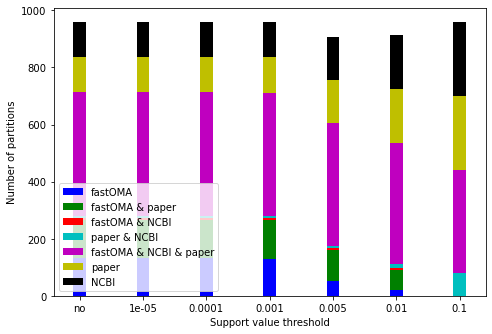

<Figure size 432x288 with 0 Axes>

In [269]:

ind=[str(i) for i in ind]
width = 0.20

palet=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, t_all_[0], width, color=palet[0])
ax.bar(ind, t_all_[1], width,bottom=t_all_[0], color=palet[1])
ax.bar(ind, t_all_[2], width,bottom=t_all_[0]+t_all_[1], color=palet[2])
ax.bar(ind, t_all_[3], width,bottom=t_all_[0]+t_all_[1]+t_all_[2], color=palet[3])
ax.bar(ind, t_all_[4], width,bottom=t_all_[0]+t_all_[1]+t_all_[2]+t_all_[3], color=palet[4])
ax.bar(ind, t_all_[5], width,bottom=t_all_[0]+t_all_[1]+t_all_[2]+t_all_[3]+t_all_[4], color=palet[5])
ax.bar(ind, t_all_[6], width,bottom=t_all_[0]+t_all_[1]+t_all_[2]+t_all_[3]+t_all_[4]+t_all_[5], color=palet[6])


ax.set_xlabel('Support value threshold')
ax.set_ylabel('Number of partitions')
#ax.set_title('Collapase edges with support value < threshold ')
ax.legend(labels=lenged1,loc=3)


plt.show()
plt.savefig(project_folder_root+"collapse2.pdf")


In [ ]:
ind=["only in fastOMA","only in fastOMA & paper",
      "only in fastOMA & NCBI","only in fastOMA & NCBI & paper",
      "only in paper","only in NCBI"]
ind

In [ ]:
# print(bird_tree_address)
# 
# out = bird_tree.robinson_foulds(ncbi_sub_tree) # ,,expand_polytomies = True expand_polytomies = True  #,polytomy_size_limit=20  ,unrooted_trees=True # , expand_polytomies = True
# (rf, max_parts, common_attrs_our, edges1, edges2, discard_t1, discard_t2)=out 
# print("RF distance is %s over a total of %s" %(rf, max_parts))
# print("Partitions of fastOMA:",len(edges1)," Partitions of ncbi:",len(edges2), "Common Partitions",len(common_attrs_our),)
# e2_1=edges2 - edges1
# print("Partitions in ncbi no in fastOMA:", len(e2_1)) # order not sure  http://etetoolkit.org/docs/latest/tutorial/tutorial_trees.html#robinson-foulds-distance
# e1_2=edges1 - edges2
# print("Partitions in fastOMA no in ncbi:", len(e1_2))



# print("-"*15)

# out = bird_paper_tree.robinson_foulds(bird_tree) # ,expand_polytomies = True, expand_polytomies = True  #,polytomy_size_limit=20  ,unrooted_trees=True # , expand_polytomies = True
# (rf, max_parts, common_attrs, edges1, edges2, discard_t1, discard_t2)=out 
# print("RF distance is %s over a total of %s" %(rf, max_parts))
# #print("Len of common_attrs",len(common_attrs),", len edges1",len(edges1),", len edges2",len(edges2))
# print("Partitions of bird_paper:",len(edges1)," Partitions of fastOMA:",len(edges2), "Common Partitions",len(common_attrs),)
# e2_1=edges2 - edges1
# print("Partitions in fastOMA not in bird_paper:", len(e2_1)) # order not sure  http://etetoolkit.org/docs/latest/tutorial/tutorial_trees.html#robinson-foulds-distance
# e1_2=edges1 - edges2
# print("Partitions in bird_paper not in fastOMA:", len(e1_2))


In [ ]:
# print(bird_tree_address)
# bird_tree.set_outgroup("CALPUG") # CALPUG MOUS  BUCCAP
# out = bird_tree.robinson_foulds(ncbi_sub_tree) # ,,expand_polytomies = True expand_polytomies = True  #,polytomy_size_limit=20  ,unrooted_trees=True # , expand_polytomies = True
# (rf, max_parts, common_attrs_our, edges1, edges2, discard_t1, discard_t2)=out 

# out = bird_paper_tree.robinson_foulds(ncbi_sub_tree) # , expand_polytomies = True  #,polytomy_size_limit=20  ,unrooted_trees=True # , expand_polytomies = True
# (rf, max_parts, common_attrs_paper, edges1, edges2, discard_t1, discard_t2)=out 


# a=list(common_attrs_our)
# for i in common_attrs_paper:
#     if i not in common_attrs_our:
#         print(i)
# len(common_attrs_our),len(common_attrs_paper),len(common_attrs_our.union(common_attrs_paper)),len(common_attrs_our.intersection(common_attrs_paper))


In [ ]:
# a=list(edges1_f)
# b=[]
# for i in a:
#     if len(i)<= 4:
#         b.append([i])


# collapsing low support values

In [ ]:
# '/work/FAC/FBM/DBC/cdessim2/default/smajidi1/fastoma/v3b/iqtree5/collpased.tree_collapsed'
print(bird_tree_address)
import dendropy
from  dendropy import Tree
#file1="_100_msa_concatanated.txt_copy1.contree"
tree = dendropy.Tree.get_from_path(bird_tree_address,"newick") # newick nexus
#print(tree)
print(len(tree))

support_treshold=95
for idx, node in enumerate(tree):
    if not node.is_leaf() and node.label:
        support_value=int(node.label)
        if support_value<support_treshold:
            #print(support_value)
            edge= node.edge
            #print(edge)
            #print(edge.head_node.child_nodes())
            edge.collapse()
print(len(tree))



bird_tree_address_out=bird_tree_address+"_collapsed2_"+str(support_treshold)
tree.write_to_path(bird_tree_address_out, "newick")
print(bird_tree_address_out)

# collapsing branch length

In [295]:
print(bird_tree_address)

bird_tree_address="/work/FAC/FBM/DBC/cdessim2/default/smajidi1/fastoma/v3b/iqtree5/_100_msa_concatanated.txt_copy1.contree"
import dendropy
from  dendropy import Tree
#file1="_100_msa_concatanated.txt_copy1.contree"
tree = dendropy.Tree.get_from_path(bird_tree_address,"newick") # newick nexus
#print(tree)
print(len(tree))

/work/FAC/FBM/DBC/cdessim2/default/smajidi1/fastoma/v3b/iqtree5/_100_msa_concatanated.txt_copy1.contree
383


In [296]:
len_all=[]
threshold=0.01
#for idx, node in enumerate(tree):
for e in tree.postorder_edge_iter():    
#     len_edg=e.length
#     if len_edg:
#         len_all.append(len_edg)
    if e.length is None or (e.length <= threshold) and e.is_internal():
        e.collapse()
        #print("he")
    #if node.is_leaf():
        #node1=node
        
        


In [240]:
bird_tree_address_out=bird_tree_address+"_collapsed_brnch_"+str(threshold)
tree.write_to_path(bird_tree_address_out, "newick")
print(bird_tree_address_out)

/work/FAC/FBM/DBC/cdessim2/default/smajidi1/fastoma/v3b/iqtree5/_100_msa_concatanated.txt_copy1.contree_collapsed_brnch_0.001


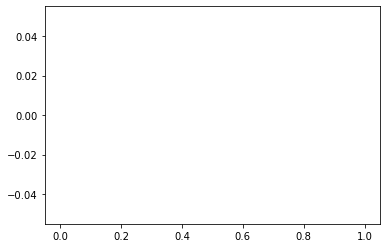

In [126]:
plt.hist(len_all,bins=500)
plt.show()

In [271]:
print(node1)

<Node object at 0x7fcd5cc2adf0: 'None' (<Taxon 0x7fcd5cc2afd0 'AREINT'>)>


In [297]:
print(tree)

(CALPUG:0.0442279389,(((((((((PIACAY:0.0801713818,CEUAER:0.0646614783)100:0.0228784507,CUCCAN:0.0611328602)100:0.0310247898,(CENBEN:0.0240586572,CENUNI:0.0149395521)100:0.10164276)100:0.0150922616,(GEOCAL:0.0727534261,CROSUL:0.0677076734)100:0.0260232709)100:0.0617796045,(CALNIC:0.0338777295,ALOBEC:0.0434599499,(PATFAS:0.0299246709,COLLIV:0.0361972251)100:0.0235068812,COLPIC:0.0778030976)100:0.0753062,((SYRPAR:0.031529652,PTEBUR:0.036832738,PTEGUT:0.0358317492)100:0.0685198442,MESUNI:0.1075795711)94:0.0106894776,(CHLMAC:0.0360185958,ARDKOR:0.0199368375,LOPRUF:0.0231818562)100:0.0625005507,(EURHEL:0.0731508393,RHYJUB:0.0576191596)100:0.0716043232,((((((((((FICAL:0.025357188,FICALB:0.0077797232)100:0.0280634004,(SAXMAU:0.0206847344,OENOEN:0.0169566006)100:0.0152329604,ERIRUB:0.0471626125)100:0.0120791331,(CERCOR:0.0222738926,COPSEC:0.0281320377)100:0.0166766715)100:0.023489794,CATFUS:0.0507766747,((LEUROT:0.016295741,STUVUL:0.012954725)100:0.0225210736,RHAINO:0.0298862201,TOXRED:0.038560